# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [25]:
cities


['salta',
 'new norfolk',
 'saskylakh',
 'ushuaia',
 'sisimiut',
 'flinders',
 'katsuura',
 'mataura',
 'pangnirtung',
 'albany',
 'vaini',
 'atuona',
 'upernavik',
 'husavik',
 'namatanai',
 'cabo san lucas',
 'rungata',
 'mys shmidta',
 'torbay',
 'bredasdorp',
 'homer',
 'punta arenas',
 'okitipupa',
 'port elizabeth',
 'ribeira grande',
 'butaritari',
 'ornskoldsvik',
 'rikitea',
 'bluff',
 'kavaratti',
 'itoman',
 'port blair',
 'saint george',
 'illoqqortoormiut',
 'jamestown',
 'saint-philippe',
 'xuddur',
 'nizhneyansk',
 'pacific grove',
 'avarua',
 'loksa',
 'sechura',
 'barrow',
 'carnarvon',
 'ancud',
 'hermanus',
 'iskateley',
 'taga',
 'sedkyrkeshch',
 'puerto ayora',
 'phan rang',
 'atar',
 'srednekolymsk',
 'olafsvik',
 'tuktoyaktuk',
 'bethel',
 'thompson',
 'caravelas',
 'carutapera',
 'yellowknife',
 'vila velha',
 'kavieng',
 'college',
 'tura',
 'ust-maya',
 'hay river',
 'yuancheng',
 'sibolga',
 'east london',
 'amga',
 'dikson',
 'khatanga',
 'srivardhan',
 'sal

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_name=[]
city_id =[]
lat=[]
long=[]
temp=[]
clouds=[]
humidity=[]
wind_speed=[]
max_temp=[]


for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units="+ 'imperial'
    weather_response1 = requests.get(query_url)
    weather1_json = weather_response1.json()
    try:
        city_name.append(weather1_json['name'])
        city_id.append(weather1_json['id'])
        temp.append(weather1_json['main']['temp'])
        max_temp.append(weather1_json['main']['temp_max'])
        lat.append(weather1_json['coord']['lat'])
        long.append(weather1_json['coord']['lon'])
        clouds.append(weather1_json['clouds']['all'])
        humidity.append(weather1_json['main']['humidity'])
        wind_speed.append(weather1_json['wind']['speed'])
        print(f"{city}: {weather1_json['id']}")
    except KeyError:
        print(f"{city} is not available")
        

salta: 3838233
new norfolk: 2155415
saskylakh: 2017155
ushuaia: 3833367
sisimiut: 3419842
flinders: 6255012
katsuura: 2112309
mataura: 6201424
pangnirtung: 6096551
albany: 5106841
vaini: 4032243
atuona: 4020109
upernavik: 3418910
husavik: 2629833
namatanai: 2090021
cabo san lucas: 3985710
rungata is not available
mys shmidta is not available
torbay: 6167817
bredasdorp: 1015776
homer: 5864145
punta arenas: 3874787
okitipupa: 2352110
port elizabeth: 964420
ribeira grande: 3372707
butaritari: 2110227
ornskoldsvik: 2686469
rikitea: 4030556
bluff: 2206939
kavaratti: 1267390
itoman: 1861280
port blair: 1259385
saint george: 5546220
illoqqortoormiut is not available
jamestown: 5122534
saint-philippe: 935215
xuddur: 49747
nizhneyansk is not available
pacific grove: 5380437
avarua: 4035715
loksa: 590552
sechura: 3691954
barrow: 5880054
carnarvon: 2074865
ancud: 3899695
hermanus: 3366880
iskateley: 866062
taga: 665628
sedkyrkeshch: 497971
puerto ayora: 3652764
phan rang is not available
atar: 23

makokou: 2399371
kalamazoo: 4997791
evensk: 2125693
west bay: 3580477
cocobeach: 2401357
ngukurr is not available
half moon bay: 5354943
luganville: 2136150
shizukuishi: 2110994
vila: 7117100
swift current: 6160603
chiali is not available
sinnamary: 3380290
solwezi: 897045
tabou: 2281120
huarmey: 3939168
kuche is not available
mangan: 1263776
warqla is not available
lavrentiya: 4031637
le pont-de-claix: 3002585
tucuman: 3836873
viedma: 3832899
saint-augustin: 6137462
garissa: 197745
launceston: 2160517
baghdad: 98182
igarka: 1505991
hirara: 1862505
tagusao: 1684245
petropavlovsk-kamchatskiy: 2122104
redmond: 5808079
high level: 5975004
augusto correa: 3406961
wladyslawowo: 3081752
samusu is not available
benin: 2395170
dharchula: 1272864
sungai pelek: 1734815
ugoofaaru: 1337619
gao: 2457161
nanuque: 3456398
belmonte: 3470137
cody: 5821593
trzebnica: 3083103
maceio: 3395981
kamen-rybolov: 2023226
touros: 3386213
ruteng: 1629380
la ronge: 6050066
emerald: 2167426
vardo: 777019
roald: 314

In [50]:
len(max_temp)

567

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
weather_dict={'city': city_name,
           'city_id':city_id,
           'latitude': lat,
           'longitude': long,
           'temperature': temp,
           'max_temp':max_temp,
           'cloudiness': clouds,
           'humidity':humidity,
           'wind_speed':wind_speed}
weather_dict
weather_df=pd.DataFrame(weather_dict)
weather_df.to_csv(r'weather_search.csv',index=False)
weather_df

,city,city_id,latitude,longitude,temperature,max_temp,cloudiness,humidity,wind_speed
0,Salta,3838233,-24.7859,-65.4117,64.18,64.40,40,88,4.61
1,New Norfolk,2155415,-42.7826,147.0587,56.21,60.01,96,73,4.00
2,Saskylakh,2017155,71.9167,114.0833,33.57,33.57,100,97,20.42
3,Ushuaia,3833367,-54.8000,-68.3000,42.80,42.80,75,93,14.97
4,Sisimiut,3419842,66.9395,-53.6735,31.78,31.78,100,70,3.31
...,...,...,...,...,...,...,...,...,...
562,Agadez,2448083,19.7500,10.2500,83.95,83.95,20,14,10.40
563,Batticaloa,1250161,7.7102,81.6924,81.73,81.73,8,76,1.57
564,Yilan,1674199,24.7570,121.7530,78.69,81.00,47,95,6.78
565,Vestmannaeyjar,3412093,63.4427,-20.2734,46.20,46.20,100,91,17.25


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [51]:
len(weather_df.loc[weather_df['humidity']>100])

0

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

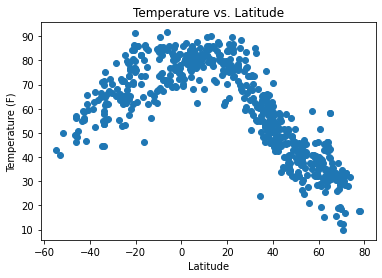

In [52]:
x=weather_df['latitude']
y=weather_df['temperature']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs. Latitude")
plt.savefig('Temp_vs_Lat')
plt.show()

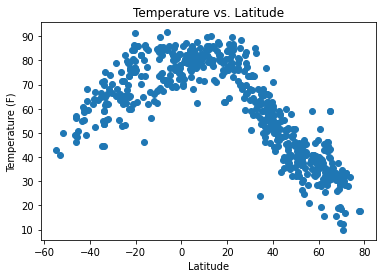

In [53]:
x=weather_df['latitude']
y=weather_df['max_temp']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs. Latitude")
plt.savefig('Temp_vs_Lat')
plt.show()

- As expected, tempertures rise the as you get closer to the equator.  The northern hemispere is still in early sprig and therefore has lower temperatures.  (Analysis 4/22)

## Latitude vs. Humidity Plot

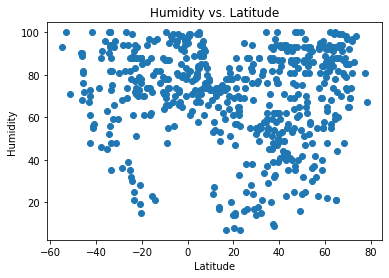

In [54]:
x=weather_df['latitude']
y=weather_df['humidity']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude")
plt.savefig('Humidity_vs_Lat')
plt.show()

 - Latitude doesn't appear to have an effect on high levels of humidity.  Although lower humidity levels are more prominent in the northern hemisphere, which could be a seasonal effect. (Analysis 4/22)

## Latitude vs. Cloudiness Plot

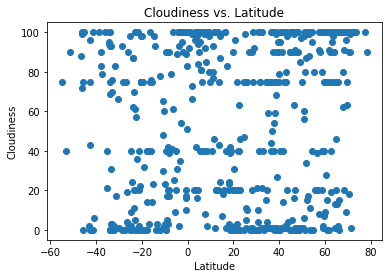

In [55]:
x=weather_df['latitude']
y=weather_df['cloudiness']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude")
plt.savefig('Cloudiness_vs_Lat')
plt.show()

- Latitude doesn't have any affect on cloudiness.  (Analysis 4/22)

## Latitude vs. Wind Speed Plot

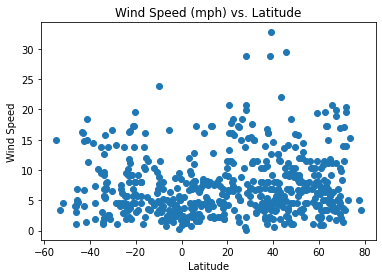

In [56]:
x=weather_df['latitude']
y=weather_df['wind_speed']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed (mph) vs. Latitude")
plt.savefig('WindSpeed_vs_Lat')
plt.show()

- There doesn't appear to be any relationship between wind speed and latitude. (Analysis 4/22)

## Linear Regression

In [57]:
northern_hem_df = weather_df.loc[weather_df['latitude']>=0]
#northern_hem_df

southern_hem_df = weather_df.loc[weather_df['latitude']<=0]
southern_hem_df

,city,city_id,latitude,longitude,temperature,max_temp,cloudiness,humidity,wind_speed
0,Salta,3838233,-24.7859,-65.4117,64.18,64.40,40,88,4.61
1,New Norfolk,2155415,-42.7826,147.0587,56.21,60.01,96,73,4.00
3,Ushuaia,3833367,-54.8000,-68.3000,42.80,42.80,75,93,14.97
5,Flinders,6255012,-34.5833,150.8552,71.01,71.01,100,52,3.00
7,Mataura,6201424,-46.1927,168.8643,48.99,48.99,99,89,1.01
...,...,...,...,...,...,...,...,...,...
539,São Félix do Xingu,3388847,-6.6447,-51.9950,71.82,71.82,41,97,0.78
544,Formosa,3433899,-26.1775,-58.1781,71.60,71.60,90,94,4.61
548,Fougamou,2400578,-1.2154,10.5838,72.41,72.41,100,96,0.20
551,Vao,2137773,-22.6667,167.4833,75.92,75.92,57,74,11.14


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

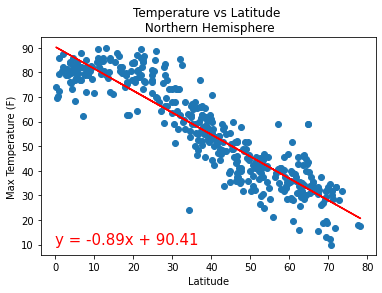

In [58]:
x=northern_hem_df['latitude']
y=northern_hem_df['max_temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Temperature vs Latitude \n Northern Hemisphere")
plt.annotate(line_eq,(0,10),fontsize=15,color='red')
plt.savefig('Temp_vs_Lat_NorthernHem')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

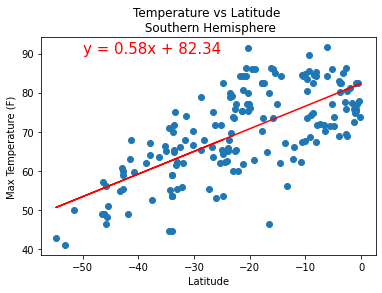

In [59]:
x=southern_hem_df['latitude']
y=southern_hem_df['max_temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Temperature vs Latitude \n Southern Hemisphere")
plt.annotate(line_eq,(-50,90),fontsize=15,color='red')
plt.savefig('Temp_vs_Lat_SouthernHem')
plt.show()

- As stated above, latitude has a directly correlated to temperatures.  The closer you are to the equator, the higher the temperatures.  This is evidenced with the regression line for both the northern and southern hemispheres graphs. (Analysis 4/22)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

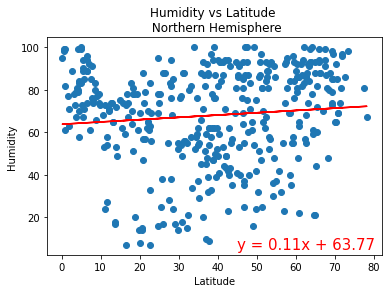

In [60]:
x=northern_hem_df['latitude']
y=northern_hem_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity vs Latitude \n Northern Hemisphere")
plt.annotate(line_eq,(45,5),fontsize=15,color='red')
plt.savefig('Humidity_vs_Lat_NorthernHem')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

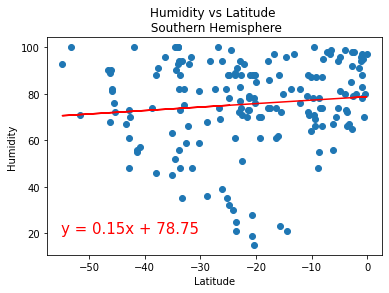

In [61]:
x=southern_hem_df['latitude']
y=southern_hem_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity vs Latitude \n Southern Hemisphere")
plt.annotate(line_eq,(-55,20),fontsize=15,color='red')
plt.savefig('Humidity_vs_Lat_SouthernHem')
plt.show()

- Latitude no affect on humidity for either the northern or southern hemisphere.  This is confirmed with the respective low r-values, northern (0.24) and southern (0.04).  (Analysis 4/23)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

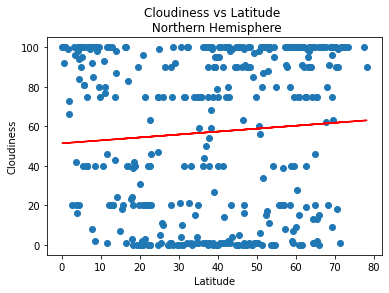

Linear regression: y = 0.15x + 51.39


In [62]:
x=northern_hem_df['latitude']
y=northern_hem_df['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Cloudiness vs Latitude \n Northern Hemisphere")
plt.savefig('Cloudiness_vs_Lat_NorthernHem')
plt.show()
print(f"Linear regression: {line_eq}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

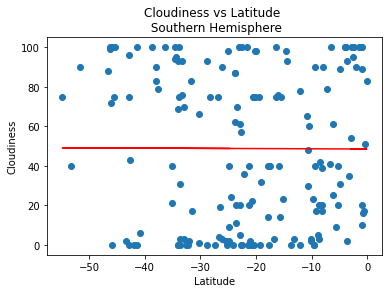

Linear regression: y = -0.01x + 48.51


In [63]:
x=southern_hem_df['latitude']
y=southern_hem_df['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Cloudiness vs Latitude \n Southern Hemisphere")
plt.savefig('Cloudiness_vs_Lat_SouthernHem')
plt.show()
print(f"Linear regression: {line_eq}")

Latitude no affect on cloudiness for either the northern or southern hemisphere. This is confirmed with the respective low r-values, northern (0.34) and southern (0.3).  The northern hemisphere's higher r-value may be due to seasonality as it is early spring.  (Analysis 4/23)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

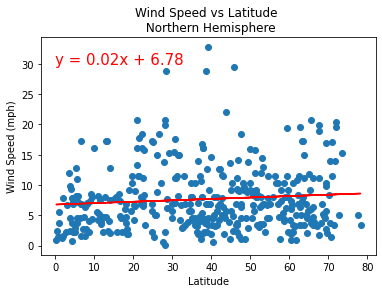

Linear regression: y = 0.02x + 6.78


In [64]:
x=northern_hem_df['latitude']
y=northern_hem_df['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed vs Latitude \n Northern Hemisphere")
plt.annotate(line_eq,(0,30),fontsize=15,color='red')
plt.savefig('WindSpeed_vs_Lat_NorthernHem')
plt.show()
print(f"Linear regression: {line_eq}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

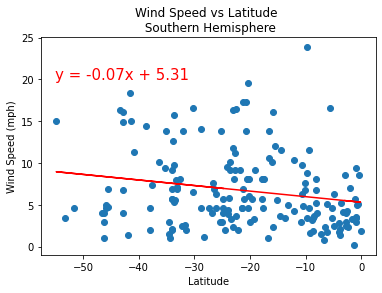

Linear regression: y = -0.07x + 5.31


In [65]:
x=southern_hem_df['latitude']
y=southern_hem_df['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed vs Latitude \n Southern Hemisphere")
plt.annotate(line_eq,(-55,20),fontsize=15,color='red')
plt.savefig('WindSpeed_vs_Lat_SouthernHem')
plt.show()
print(f"Linear regression: {line_eq}")

Wind speed is not related to latitude.   This is confirmed with the respective low r-values, northern (0.0) and southern (0.03). (Analysis 4/23)